Wehn you work with big datasets you maybe face overfitting! Overfitting happend when the model is too complex. when it happends, train test work properly but model does not match the test set. 

In linear regression all features have a non-zero coefficient in model, even if they are not actully effects!

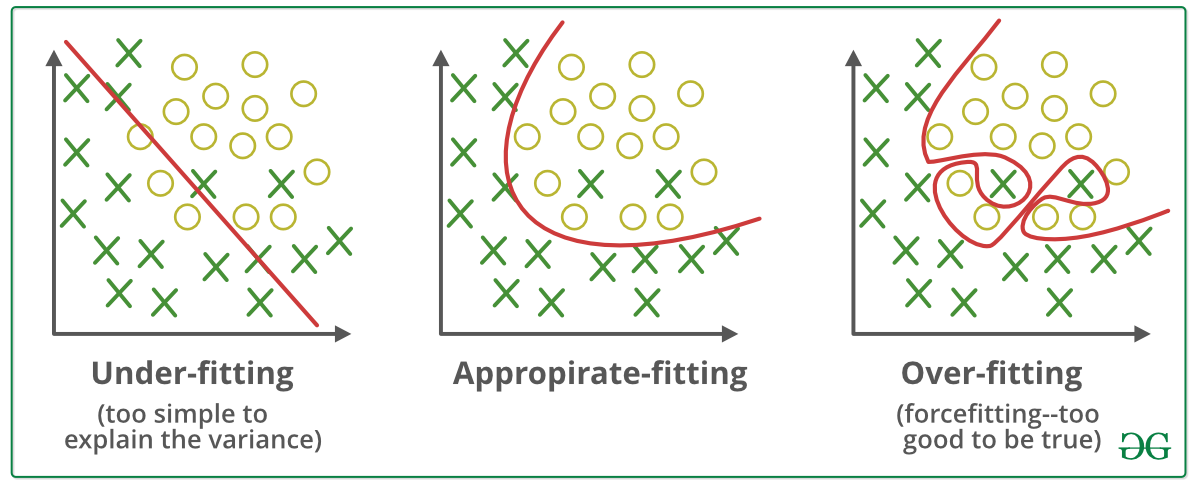

For Reducing the effect of overfitting we can reduce Dimensions of the dataset. There are some methods for regularization that make a function to increas cost of increasing model coefficients, so model try to remove some features. 

In this notebook we try to use some of these methods for getting better results.

before that once-over we review the steps of building model and evaluating it after preprocessing with skleran!

1. Choose the model type (LinearRegression, Ridge, RidgeCv,...)
2. train model with model.fit
3. predicting model
4. evaluate with Indicators

In [ ]:
# we import Basic ML Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1. Import Data and first review
In first step we should import dataset and check it for basic information and EDA.

In [ ]:
df= pd.read_csv('../input/real-estate-price-prediction/Real estate.csv')

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
sns.pairplot(df)

As we could see, there are 5 factors that maybe have effects on price. Transaction date, house age, distance to the nearest MRT station, number of convenience stores, latitude and longitude.

with correlation analysis we can figure out the basis information about dependence between features.

In [ ]:
df.corr()

# 2. Define features and Target Variable
now we have to determine which columns are features and which one is target variable. 

In [ ]:
#we can delet 'No' column to increase power of model.

#X : Features
#y : Target variable

X = df.drop('Y house price of unit area', axis= 1)
y = df['Y house price of unit area']

# 3. Preprocessing Data ( for Polynomial Conversion )

In my last notebook (checking same dataset for polynomial regression) we find out the best degree for these model is "2". You can check that here: https://www.kaggle.com/javadmaddah/polynomial-regression-on-real-estate-week-3-2

In [ ]:
#for considering interaction between features we use polynomial features

from sklearn.preprocessing import PolynomialFeatures

polynomial_converter= PolynomialFeatures(degree=2, include_bias=False)
poly_features= polynomial_converter.fit_transform(X)

poly_features.shape

as we can see at first we have 8 columns (7 features) and after Polynomial conversion we have 35 features for building model.

# 4. Split data to train - test set

In [ ]:
#we use train_test_split from sklearn.model_selection to devide dataset to train and test set.

from sklearn.model_selection import train_test_split

#train set in a bigger sample of dataset that model uses to learn.
#test set in smaller sample of dataset that model should be evaluated in.

X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

#random_state before spliting controls shuffling dataset

# 5. Scaling the data

In [ ]:
#we use StandardScaler from sklearn.preprocessing to Standard all features set
 
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler() #scaler is StandardScaler Class 
scaler.fit(X_train) 

X_train_standard= scaler.transform(X_train)
X_test_standard = scaler.transform(X_test)

we can compare one of X_train column with same column of X_train_standard to see differences.

In [ ]:
a = {'X_train':X_train[1], 'X_train_standard': X_train_standard[1]}
pd.DataFrame(a)

# 6. Regularization
After preprocessing data we can build models we want. In the following we build 3 models with 3 Algorithms.

1. Ridge Regression
2. Lasso Regression
3. Elastic Net

### 6-1. Ridge Regression

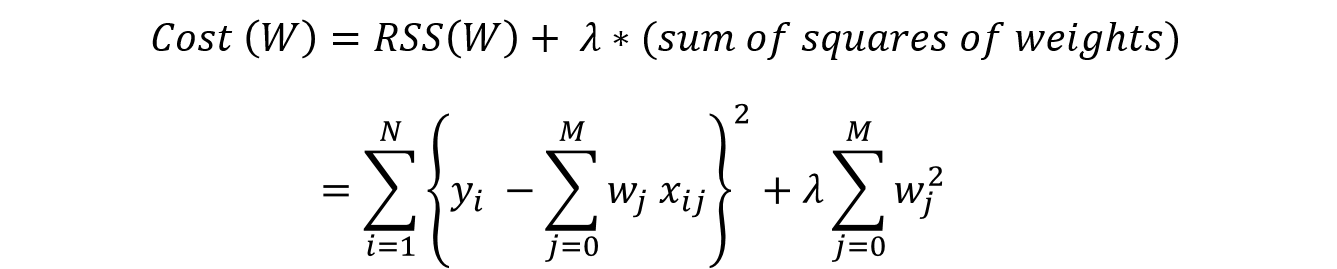

In [ ]:
from sklearn.linear_model import Ridge

#step 1: Choose the model type
ridge_model = Ridge (alpha= 6)

#step 2: Train the model with fit
ridge_model.fit(X_train_standard, y_train)

#step 3: Predecting model
y_pred= ridge_model.predict(X_test_standard)

#step 4: Evaluating the model

from sklearn.metrics import mean_absolute_error, mean_squared_error

Ridge_MAE = mean_absolute_error(y_test, y_pred)
Ridge_MSE = mean_squared_error(y_test, y_pred)
Ridge_RMSE = np.sqrt(Ridge_MSE)

pd.DataFrame([Ridge_MAE, Ridge_MSE, Ridge_RMSE], index=['MAE', 'MSE', 'RMSE'], columns=['metrics'])

#### 6-1-1. Ridge Regression with Cross-validation

In [ ]:
from sklearn.linear_model import RidgeCV

ridge_cv_model=RidgeCV(alphas=(0.1, 1.0, 10.0), scoring='neg_mean_absolute_error')

ridge_cv_model.fit(X_train_standard, y_train)

y_pred_ridge= ridge_cv_model.predict(X_test_standard)

RidgeCV_MAE= mean_absolute_error(y_test, y_pred_ridge)
RidgeCV_MSE= mean_squared_error(y_test, y_pred_ridge)
RidgeCV_RMSE= np.sqrt(RidgeCV_MSE)

pd.DataFrame([RidgeCV_MAE, RidgeCV_MSE, RidgeCV_RMSE], index=['MAE', 'MSE', 'RMSE'], columns=['Ridge Metrics'])

### 6-2. Lasso Regression with Cross-validation

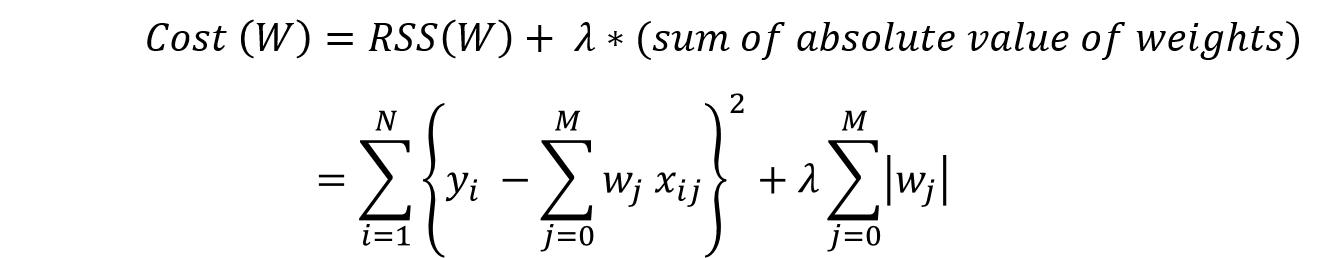

In [ ]:
from sklearn.linear_model import LassoCV

#step 1: Choose the model type
lasso_cv_model= LassoCV(eps=0.01, n_alphas=100, cv=5)

#step 2: Train the model with fit
lasso_cv_model.fit(X_train_standard, y_train)

#step 3: Predecting model
y_pred_lasso= lasso_cv_model.predict(X_test_standard)

#step 4: Evaluating the model

Lasso_MAE= mean_absolute_error(y_test, y_pred_lasso)
Lasso_MSE= mean_squared_error(y_test, y_pred_lasso)
Lasso_RMSE= np.sqrt(Lasso_MSE)

pd.DataFrame([Lasso_MAE, Lasso_MSE, Lasso_RMSE], index=['MAE', 'MSE', 'RMSE'], columns=['Lasso Metrics'])

### 6-3. Elastic Net with Cross-validation
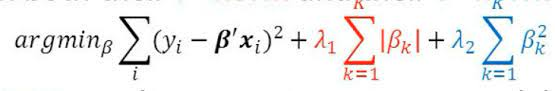

In [ ]:
from sklearn.linear_model import ElasticNetCV

#step 1: Choose the model type
elastic_model= ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1],cv=5, max_iter=100000)

#step 2: Train the model with fit
elastic_model.fit(X_train_standard, y_train)

#step 3: Predecting model
y_pred_elastic=elastic_model.predict(X_test_standard)

#step 4: Evaluating the model

MAE_Elastic= mean_absolute_error(y_test, y_pred_elastic)
MSE_Elastic= mean_squared_error(y_test, y_pred_elastic)
RMSE_Elastic= np.sqrt(MSE_Elastic)

pd.DataFrame([MAE_Elastic, MSE_Elastic, RMSE_Elastic], index=['MAE', 'MSE', 'RMSE'], columns=['Elastic Metrics'])

In [ ]:
np.count_nonzero(elastic_model.coef_)

# 7. Compare models

In [ ]:
metrics_compare = pd.DataFrame({'Model':['Ridge','RidgeCV','LassoCV','Elastic Net'],
                                'MAE':[Ridge_MAE,RidgeCV_MAE,Lasso_MAE,MAE_Elastic],
                                'MSE':[Ridge_MSE,RidgeCV_MSE,Lasso_MAE,MSE_Elastic],
                                'RMSE': [Ridge_RMSE,RidgeCV_RMSE,Lasso_RMSE,RMSE_Elastic]})
metrics_compare

In [ ]:
from math import ceil

data = metrics_compare

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

axs[0].bar(metrics_compare['Model'], metrics_compare['MAE'])
axs[1].scatter(metrics_compare['Model'], metrics_compare['MAE'])
axs[2].plot(metrics_compare['Model'], metrics_compare['MAE'])
fig.suptitle('MAE Compare')

plt.ylim([4.3000, 4.5000])

In [ ]:
print('Ridge model has {} zero Coefficient.'.format(list(ridge_model.coef_).count(0)))
print('Ridge with cross validation model has {} zero Coefficient.'.format(list(ridge_cv_model.coef_).count(0)))
print('Lasso Regression model has {} zero Coefficient.'.format(list(lasso_cv_model.coef_).count(0)))
print('Elastic net model has {} zero Coefficient.'.format(list(elastic_model.coef_).count(0)))